## imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from tabulate import tabulate
from rna_secstruct import SecStruct
from tqdm import tqdm

## load data

In [2]:
REVISION_PATH = "../data/revisions"
DATA_PATH = "../data"

In [3]:
df_nomod_norm_res = pd.read_json(
    f"{REVISION_PATH}/normalized/residues/pdb_library_nomod_normalized_residues.json"
)
df_denature_norm_res = pd.read_json(
    f"{REVISION_PATH}/normalized/residues/pdb_library_denature_normalized_residues.json"
)
df_construct = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1.json")

df_avg = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues_avg.json")

df_1000_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_1_residues_1000.json"
)
df_2000_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_1_residues_2000.json"
)
df_3000_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_1_residues_3000.json"
)
df_4000_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_1_residues_4000.json"
)
df_5000_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_1_residues_5000.json"
)
df_10000_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_1_residues_10000.json"
)
df_20000_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_1_residues_20000.json"
)
df_denature_res = pd.read_json(
    f"{REVISION_PATH}/dif_threshold/residues/pdb_library_denature_residues_2000.json"
)

## Extra Functions

In [4]:
df_1000_res = df_1000_res.query("r_type != 'WC'").copy()
with np.errstate(divide="ignore"):
    df_1000_res["ln_r_data"] = np.log(df_1000_res["r_data"])

df_1000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)
print(f"1000:{len(df_1000_res)}")
df_1000_res = df_1000_res.query("r_data_outlier == False").copy()
print(f"1000:{len(df_1000_res)}")


df_2000_res = df_2000_res.query("r_type != 'WC'").copy()
with np.errstate(divide="ignore"):
    df_2000_res["ln_r_data"] = np.log(df_2000_res["r_data"])

df_2000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)
print(f"2000:{len(df_2000_res)}")
df_2000_res = df_2000_res.query("r_data_outlier == False").copy()
print(f"2000:{len(df_2000_res)}")


df_3000_res = df_3000_res.query("r_type != 'WC'").copy()
with np.errstate(divide="ignore"):
    df_3000_res["ln_r_data"] = np.log(df_3000_res["r_data"])

df_3000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)
print(f"3000:{len(df_3000_res)}")
df_3000_res = df_3000_res.query("r_data_outlier == False").copy()
print(f"3000:{len(df_3000_res)}")


df_4000_res = df_4000_res.query("r_type != 'WC'").copy()
with np.errstate(divide="ignore"):
    df_4000_res["ln_r_data"] = np.log(df_4000_res["r_data"])

df_4000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)
print(f"4000:{len(df_4000_res)}")
df_4000_res = df_4000_res.query("r_data_outlier == False").copy()
print(f"4000:{len(df_4000_res)}")


df_5000_res = df_5000_res.query("r_type != 'WC'").copy()
with np.errstate(divide="ignore"):
    df_5000_res["ln_r_data"] = np.log(df_5000_res["r_data"])

df_5000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)
print(f"5000:{len(df_5000_res)}")
df_5000_res = df_5000_res.query("r_data_outlier == False").copy()
print(f"5000:{len(df_5000_res)}")


df_10000_res = df_10000_res.query("r_type != 'WC'").copy()
with np.errstate(divide="ignore"):
    df_10000_res["ln_r_data"] = np.log(df_10000_res["r_data"])

df_10000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)
print(f"10000:{len(df_10000_res)}")
df_10000_res = df_10000_res.query("r_data_outlier == False").copy()
print(f"10000:{len(df_10000_res)}")


df_20000_res = df_20000_res.query("r_type != 'WC'").copy()
with np.errstate(divide="ignore"):
    df_20000_res["ln_r_data"] = np.log(df_20000_res["r_data"])

df_20000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)
print(f"20000:{len(df_20000_res)}")
df_20000_res = df_20000_res.query("r_data_outlier == False").copy()
print(f"20000:{len(df_20000_res)}")

/var/folders/jb/h5qjq4n15qg56r7dptdffxch5f0py6/T/ipykernel_31919/1250553677.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


1000:237837
1000:235402


/var/folders/jb/h5qjq4n15qg56r7dptdffxch5f0py6/T/ipykernel_31919/1250553677.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


2000:237528
2000:235104


/var/folders/jb/h5qjq4n15qg56r7dptdffxch5f0py6/T/ipykernel_31919/1250553677.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_3000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


3000:236901
3000:234494


/var/folders/jb/h5qjq4n15qg56r7dptdffxch5f0py6/T/ipykernel_31919/1250553677.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_4000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


4000:236128
4000:233737


/var/folders/jb/h5qjq4n15qg56r7dptdffxch5f0py6/T/ipykernel_31919/1250553677.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_5000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


5000:234957
5000:232584


/var/folders/jb/h5qjq4n15qg56r7dptdffxch5f0py6/T/ipykernel_31919/1250553677.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_10000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


10000:223865
10000:221666
20000:176987
20000:175298


/var/folders/jb/h5qjq4n15qg56r7dptdffxch5f0py6/T/ipykernel_31919/1250553677.py:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_20000_res["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


## Extra definitions

In [5]:
def format_small_plot(ax):
    """
    Formats a small plot with specified style parameters. Plot is expected to have
    a single subplot and setup like

    ```python
    fig, ax = plt.subplots(figsize=(1.50, 1.25), dpi=200)
    ```

    Args:
        ax: The matplotlib Axes object to format.

    Returns:
        None
    """
    publication_style_ax(ax, fsize=8, ytick_size=6, xtick_size=6)
    plt.subplots_adjust(left=0.3, bottom=0.21, top=0.98)

In [6]:
def publication_style_ax(
    ax, fsize: int = 10, ytick_size: int = 8, xtick_size: int = 8
) -> None:
    """
    Applies publication style formatting to the given matplotlib Axes object.
    Args:
        ax (matplotlib.axes.Axes): The Axes object to apply the formatting to.
        fsize (int, optional): The font size for labels, title, and tick labels. Defaults to 10.
        ytick_size (int, optional): The font size for y-axis tick labels. Defaults to 8.
        xtick_size (int, optional): The font size for x-axis tick labels. Defaults to 8.
    Returns:
        None
    """
    # Set line widths and tick widths
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
    ax.tick_params(width=0.5, size=1.5, pad=1)

    # Set font sizes for labels and title
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.title.set_fontsize(fsize)

    # Set font names for labels, title, and tick labels
    ax.xaxis.label.set_fontname("Arial")
    ax.yaxis.label.set_fontname("Arial")
    ax.title.set_fontname("Arial")
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontname("Arial")

    # Set font sizes for tick labels
    for label in ax.get_yticklabels():
        label.set_fontsize(ytick_size)
    for label in ax.get_xticklabels():
        label.set_fontsize(xtick_size)

    # Set font sizes for text objects added with ax.text()
    for text in ax.texts:
        text.set_fontname("Arial")
        text.set_fontsize(fsize - 2)

In [7]:
def compute_distribution_splits(df, threshold, column="reac_ratio"):
    # Extract data
    blue = df.query("r_type == 'Flank-WC'")[column].dropna()
    orange = df.query("r_type == 'NON-WC'")[column].dropna()

    # Percentage of orange (NON-WC) to the left of threshold
    orange_left_pct = np.mean(orange < threshold) * 100

    # Percentage of blue (Flank-WC) to the right of threshold
    blue_right_pct = np.mean(blue > threshold) * 100

    return orange_left_pct, blue_right_pct

## Comparing second flanking pair grouping compared to random

#### This was an analysis done in the main paper. The following analyses were carried out in response to the reviewer’s request and to further validate the correctness of our original results

In [8]:
# Group the data and calculate statistics
df_second_stack = (
    df_2000_res.groupby(
        ["m_sequence", "r_loc_pos", "m_second_flank_bp_5p", "m_second_flank_bp_3p"]
    )
    .agg(
        m_token=("m_token", "first"),
        likely_pair=("likely_pair", "first"),
        m_flank_bp_5p=("m_flank_bp_5p", "first"),
        m_flank_bp_3p=("m_flank_bp_3p", "first"),
        p5_res=("p5_res", "first"),
        p3_res=("p3_res", "first"),
        r_stack=("r_stack", "first"),
        mean_ln_r_data=("ln_r_data", "mean"),
        std_ln_r_data=("ln_r_data", "std"),
        cv_r_data=("r_data", lambda x: np.std(x) / np.mean(x)),
        count=("ln_r_data", "count"),
        r_type=("r_type", "first"),
    )
    .reset_index()
)
print(df_second_stack["r_type"].unique(), df_second_stack["count"].unique())
unique_counts = df_second_stack.query("r_type == 'Flank-WC'")["count"].unique()
print(unique_counts)

['Flank-WC' 'NON-WC'] [ 1  2  3  4  5  8  9  6 13 20 12 11  7 10 15 17 19 16 14 24 18 21 25 26
 22]
[ 1  2  3  4  5  8  9  6 13 20 12 11  7 10 15 17 19 16 14 24 18 21 25 22]


In [9]:
if not os.path.exists(f"{REVISION_PATH}/cv_csvs/randomized_cvs.csv"):
    data = []
    for i, row in df_second_stack.query("count >= 5").iterrows():
        df_sub = df_2000_res.query(
            f"m_sequence == '{row['m_sequence']}' and r_loc_pos == {row['r_loc_pos']}"
        ).sample(row["count"])
        cv = np.std(df_sub["r_data"]) / np.mean(df_sub["r_data"])
        data.append(
            {
                "m_sequence": row["m_sequence"],
                "r_loc_pos": row["r_loc_pos"],
                "cv_r_data": cv,
                "r_type": row["r_type"],
            }
        )
    df_sub = pd.DataFrame(data)
    df_sub.to_csv(f"{REVISION_PATH}/cv_csvs/randomized_cvs.csv", index=False)
else:
    df_sub = pd.read_csv(f"{REVISION_PATH}/cv_csvs/randomized_cvs.csv")

In [10]:
df_sub = pd.read_csv(f"{REVISION_PATH}/cv_csvs/randomized_cvs.csv")

In [11]:
df_ex = df_sub.query("r_type == 'Flank-WC'")
df_ex

,m_sequence,r_loc_pos,cv_r_data,r_type
0,AAA&UAU,0,0.528843,Flank-WC
1,AAA&UAU,0,0.478152,Flank-WC
4,AAA&UAU,2,0.506891,Flank-WC
5,AAA&UAU,2,0.598603,Flank-WC
8,AAA&UGU,0,0.271119,Flank-WC
...,...,...,...,...
22588,UUCA&UUUA,8,0.587405,Flank-WC
22589,UUCA&UUUA,8,0.578317,Flank-WC
22590,UUCA&UUUA,8,0.519469,Flank-WC
22596,UUCUA&UUCUA,4,0.417654,Flank-WC


In [12]:
df_cv = (
    df_2000_res.groupby(["m_sequence", "r_loc_pos"])
    .agg(
        cv_r_data=("r_data", lambda x: np.std(x) / np.mean(x)),
        r_type=("r_type", "first"),
    )
    .reset_index()
)
df_cv["data_type"] = "None"
df_second_stack_cv = df_second_stack.query("count >= 5").copy()
df_second_stack_cv["data_type"] = "Second Stack"
df_sub["data_type"] = "Random"
df_all = pd.concat([df_second_stack_cv, df_cv, df_sub]).reset_index(drop=True)

In [13]:
print(
    "average no group WC: "
    + str(df_cv.query("r_type == 'Flank-WC'")["cv_r_data"].mean())
)
print(
    "average with second WC grouping : "
    + str(df_second_stack_cv.query("r_type == 'Flank-WC'")["cv_r_data"].mean())
)
print(
    "average with random grouping: "
    + str(df_sub.query("r_type == 'Flank-WC'")["cv_r_data"].mean())
)
print(
    "average no group NON-WC: "
    + str(df_cv.query("r_type == 'NON-WC'")["cv_r_data"].mean())
)
print(
    "average with second NON-WC grouping : "
    + str(df_second_stack_cv.query("r_type == 'NON-WC'")["cv_r_data"].mean())
)
print(
    "average with random grouping: "
    + str(df_sub.query("r_type == 'NON-WC'")["cv_r_data"].mean())
)

average no group WC: 0.4248140744670936
average with second WC grouping : 0.33967051908293167
average with random grouping: 0.3732993674091286
average no group NON-WC: 0.29662828917958667
average with second NON-WC grouping : 0.2232174827769173
average with random grouping: 0.26921674157402614


## Checking the WC/Non-WC for each data type

In [14]:
grouped_stats = (
    df_all.groupby(["r_type", "data_type"])["cv_r_data"]
    .describe(percentiles=[0.25, 0.5, 0.75])
    .loc[:, ["25%", "50%", "75%"]]
    .rename(columns={"25%": "Q1", "50%": "Median", "75%": "Q3"})
)

# Step 2: Add new columns
grouped_stats["IQR"] = grouped_stats["Q3"] - grouped_stats["Q1"]
grouped_stats["Median + IQR"] = grouped_stats["Median"] + grouped_stats["IQR"]
grouped_stats["Median - IQR"] = grouped_stats["Median"] - grouped_stats["IQR"]

print(grouped_stats)

                             Q1    Median        Q3       IQR  Median + IQR  \
r_type   data_type                                                            
Flank-WC None          0.362449  0.412337  0.476941  0.114492      0.526828   
         Random        0.281911  0.360719  0.450327  0.168415      0.529135   
         Second Stack  0.248389  0.323507  0.413743  0.165354      0.488861   
NON-WC   None          0.231899  0.281566  0.342292  0.110393      0.391959   
         Random        0.190033  0.252336  0.325682  0.135649      0.387985   
         Second Stack  0.154091  0.208480  0.274497  0.120406      0.328886   

                       Median - IQR  
r_type   data_type                   
Flank-WC None              0.297845  
         Random            0.192304  
         Second Stack      0.158152  
NON-WC   None              0.171173  
         Random            0.116687  
         Second Stack      0.088074  


In [15]:
# Create median dataframe
median_df = (
    df_all.groupby(["r_type", "data_type"])["cv_r_data"]
    .median()
    .reset_index()
    .rename(columns={"cv_r_data": "median_cv"})
)

# Calculate WC / NON-WC median CV ratios for each data_type
ratios = (
    median_df.pivot(index="data_type", columns="r_type", values="median_cv")
    .reset_index()
    .assign(median_ratio_WC_vs_NON_WC=lambda d: d["Flank-WC"] / d["NON-WC"])
)
print("Median CV ratios (WC / NON-WC):")
print(ratios[["data_type", "median_ratio_WC_vs_NON_WC"]])

Median CV ratios (WC / NON-WC):
r_type     data_type  median_ratio_WC_vs_NON_WC
0               None                   1.464442
1             Random                   1.429521
2       Second Stack                   1.551738


## Applying bootstrap algorithm to see if the ratios are significantly different or not

In [16]:
"""
Bootstrapping is a resampling technique, which draws random samples from the dataset with replacement.
"""


def bootstrap_ratio(df, group_name, n_boot=50000):
    wc = df.query("r_type == 'Flank-WC' and data_type == @group_name")[
        "cv_r_data"
    ].values
    non_wc = df.query("r_type == 'NON-WC' and data_type == @group_name")[
        "cv_r_data"
    ].values

    ratios = []
    for _ in tqdm(range(n_boot)):
        wc_sample = np.random.choice(wc, size=len(wc), replace=True)
        non_wc_sample = np.random.choice(non_wc, size=len(non_wc), replace=True)
        ratio = np.median(wc_sample) / np.median(non_wc_sample)
        ratios.append(ratio)

    return np.array(ratios)


# Bootstrap for Random and Second Stack
ratios_random = bootstrap_ratio(df_all, "Random")
ratios_stack = bootstrap_ratio(df_all, "Second Stack")

# Compare to the baseline value from "None"
baseline_ratio = 1.464442

# 95% confidence intervals
ci_random = np.percentile(ratios_random, [0.5, 99.5])
ci_stack = np.percentile(ratios_stack, [0.5, 99.5])

print(
    f"Random 99% CI: {ci_random}, contains baseline? {ci_random[0] <= baseline_ratio <= ci_random[1]}"
)
print(
    f"Second Stack 99% CI: {ci_stack}, contains baseline? {ci_stack[0] <= baseline_ratio <= ci_stack[1]}"
)

100%|██████████| 50000/50000 [00:20<00:00, 2401.09it/s]

Random 99% CI: [1.40849486 1.45215604], contains baseline? False
Second Stack 99% CI: [1.52442909 1.58005087], contains baseline? False


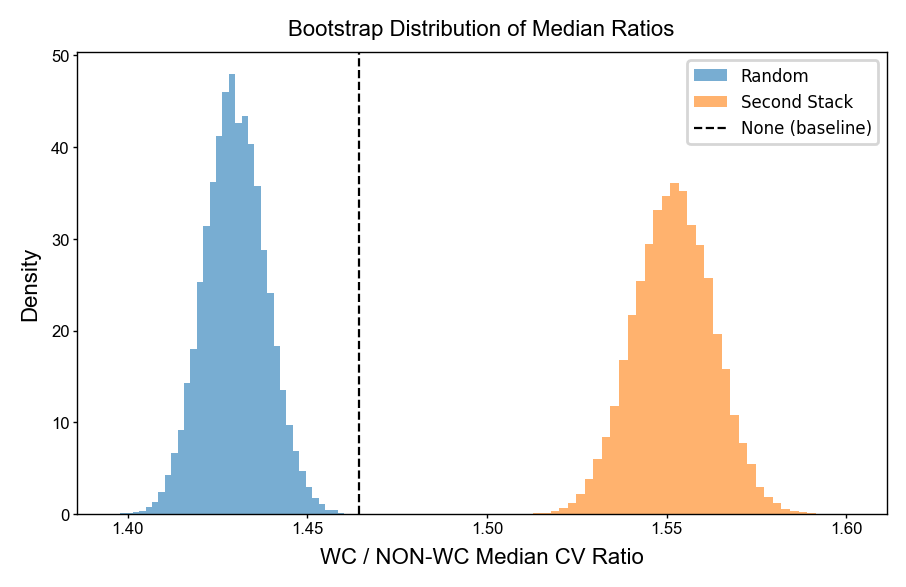

In [17]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)

ax.hist(ratios_random, bins=40, alpha=0.6, label="Random", density=True)
ax.hist(ratios_stack, bins=40, alpha=0.6, label="Second Stack", density=True)
ax.axvline(
    baseline_ratio,
    color="black",
    linestyle="--",
    linewidth=0.8,
    label="None (baseline)",
)

ax.set_xlabel("WC / NON-WC Median CV Ratio")
ax.set_ylabel("Density")
ax.set_title("Bootstrap Distribution of Median Ratios", fontsize=8)
ax.legend(fontsize=6)

fig.tight_layout()
format_small_plot(ax)

fig.savefig(f"{REVISION_PATH}/figures/bootstrap_ratio_comparison.png", dpi=600)
plt.show()

#### Up to this point, the analysis has addressed a single reviewer comment.

#### After this, each main topic corresponds to one reviewer comment

## CV for Flank-WC and non-WC at different coverage thresholds

In [18]:
def process_dataframe(df, randomized_csv=f"{REVISION_PATH}/cv_csvs/randomized_cvs.csv"):
    """
    Process input dataframe to compute coefficient of variation (CV)
    for second stack and randomized subsets, and return combined results.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe containing columns:
        ['m_sequence', 'r_loc_pos', 'm_second_flank_bp_5p', 'm_second_flank_bp_3p',
         'm_token', 'likely_pair', 'm_flank_bp_5p', 'm_flank_bp_3p',
         'p5_res', 'p3_res', 'r_stack', 'ln_r_data', 'r_data', 'r_type']
    randomized_csv : str
        Path to store/reuse randomized CV results.

    Returns
    -------
    df_all : pd.DataFrame
        Combined dataframe with CV values and data_type labels.
    """

    # Aggregate per second stack
    df_second_stack = (
        df.groupby(
            ["m_sequence", "r_loc_pos", "m_second_flank_bp_5p", "m_second_flank_bp_3p"]
        )
        .agg(
            m_token=("m_token", "first"),
            likely_pair=("likely_pair", "first"),
            m_flank_bp_5p=("m_flank_bp_5p", "first"),
            m_flank_bp_3p=("m_flank_bp_3p", "first"),
            p5_res=("p5_res", "first"),
            p3_res=("p3_res", "first"),
            r_stack=("r_stack", "first"),
            mean_ln_r_data=("ln_r_data", "mean"),
            std_ln_r_data=("ln_r_data", "std"),
            cv_r_data=("r_data", lambda x: np.std(x) / np.mean(x)),
            count=("ln_r_data", "count"),
            r_type=("r_type", "first"),
        )
        .reset_index()
    )

    # Create randomized CVs if not already saved
    if not os.path.exists(randomized_csv):
        data = []
        for _, row in df_second_stack.query("count >= 5").iterrows():
            df_sub = df.query(
                f"m_sequence == '{row['m_sequence']}' and r_loc_pos == {row['r_loc_pos']}"
            ).sample(row["count"])
            cv = np.std(df_sub["r_data"]) / np.mean(df_sub["r_data"])
            data.append(
                {
                    "m_sequence": row["m_sequence"],
                    "r_loc_pos": row["r_loc_pos"],
                    "cv_r_data": cv,
                    "r_type": row["r_type"],
                }
            )
        df_sub = pd.DataFrame(data)
        df_sub.to_csv(randomized_csv, index=False)
    else:
        df_sub = pd.read_csv(randomized_csv)

    # CV for all data
    df_cv = (
        df.groupby(["m_sequence", "r_loc_pos"])
        .agg(
            cv_r_data=("r_data", lambda x: np.std(x) / np.mean(x)),
            r_type=("r_type", "first"),
        )
        .reset_index()
    )
    df_cv["data_type"] = "all"

    # Second stack subset
    df_second_stack_cv = df_second_stack.query("count >= 5").copy()
    df_second_stack_cv["data_type"] = "Second Stack"

    # Combine results
    df_all = pd.concat([df_second_stack_cv, df_cv]).reset_index(drop=True)

    return df_all, df_sub

In [19]:
df_all_1000, df_random_1000 = process_dataframe(
    df_1000_res, randomized_csv=f"{REVISION_PATH}/cv_csvs/randomized_cvs_1000.csv"
)
df_all_2000, df_random_2000 = process_dataframe(
    df_2000_res, randomized_csv=f"{REVISION_PATH}/cv_csvs/randomized_cvs_2000.csv"
)
df_all_3000, df_random_3000 = process_dataframe(
    df_3000_res, randomized_csv=f"{REVISION_PATH}/cv_csvs/randomized_cvs_3000.csv"
)
df_all_4000, df_random_4000 = process_dataframe(
    df_4000_res, randomized_csv=f"{REVISION_PATH}/cv_csvs/randomized_cvs_4000.csv"
)
df_all_5000, df_random_5000 = process_dataframe(
    df_5000_res, randomized_csv=f"{REVISION_PATH}/cv_csvs/randomized_cvs_5000.csv"
)
df_all_10000, df_random_10000 = process_dataframe(
    df_10000_res, randomized_csv=f"{REVISION_PATH}/cv_csvs/randomized_cvs_10000.csv"
)
df_all_20000, df_random_20000 = process_dataframe(
    df_20000_res, randomized_csv=f"{REVISION_PATH}/cv_csvs/randomized_cvs_20000.csv"
)

In [20]:
df_all_1000["num_aligned"] = 1000
df_all_2000["num_aligned"] = 2000
df_all_3000["num_aligned"] = 3000
df_all_4000["num_aligned"] = 4000
df_all_5000["num_aligned"] = 5000
df_all_10000["num_aligned"] = 10000
df_all_20000["num_aligned"] = 20000
df_all_concat = pd.concat(
    [
        df_all_1000,
        df_all_2000,
        df_all_3000,
        df_all_4000,
        df_all_5000,
        df_all_10000,
        df_all_20000,
    ],
    ignore_index=True,
)
print(
    len(df_all_1000),
    len(df_all_2000),
    len(df_all_3000),
    len(df_all_4000),
    len(df_all_5000),
    len(df_all_10000),
    len(df_all_20000),
)

25748 25722 25675 25606 25491 24194 18459


0.2964332408534212
0.22305494688783792
0.4232995497574826
0.3386439240218081
0.29629526268816336
0.22276060511569684
0.4223885929355779
0.3378096921871937
0.29598010068114355
0.22245283682104103
0.4213229564589233
0.33637536479771946
0.29451910293667083
0.22107138250582817
0.41225224525620796
0.32936413228548267
0.291600114123304
0.2172627395211044
0.3954467334791037
0.31596481897030615


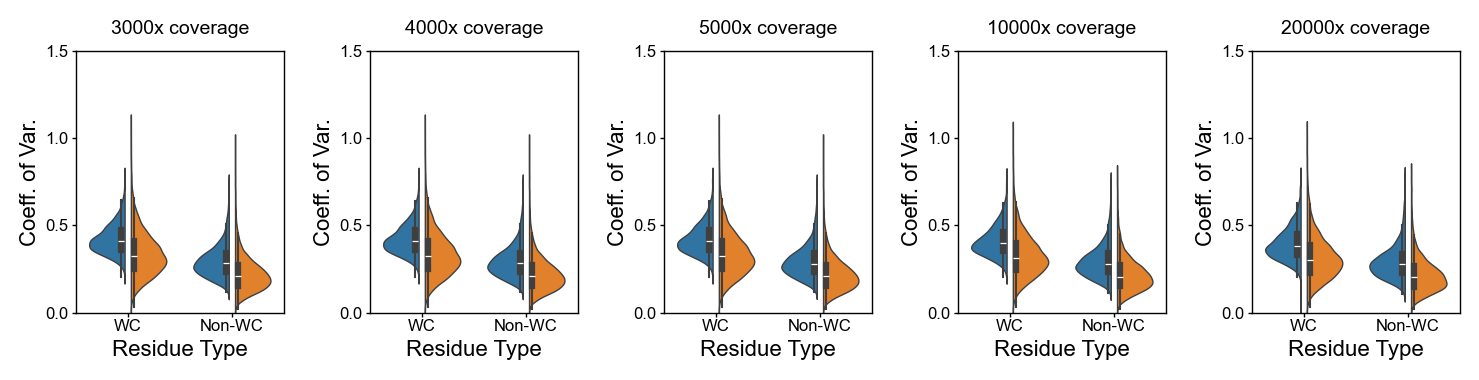

In [21]:
def figure_1h_all(df, ax, title=None):
    sns.violinplot(
        data=df,
        y="cv_r_data",
        x="r_type",
        density_norm="width",
        linewidth=0.5,
        hue="data_type",
        split=True,
        gap=0.15,
        ax=ax,
        hue_order=["all", "Second Stack"],
    )
    ax.set_xlabel("Residue Type", labelpad=2)
    ax.set_ylabel("Coeff. of Var.", labelpad=2)
    format_small_plot(ax)
    ax.legend_ = None
    ax.set_ylim(0, 1.5)
    ax.set_xticks([0, 1], labels=["WC", "Non-WC"])
    if title:
        ax.set_title(title, fontsize=7)


# Plotting three subplots
fig, axes = plt.subplots(1, 5, figsize=(7.5, 2), dpi=200)

for ax, df_a, cov in zip(
    axes,
    [df_all_3000, df_all_4000, df_all_5000, df_all_10000, df_all_20000],
    [3000, 4000, 5000, 10000, 20000],
):
    figure_1h_all(df_a, ax, title=f"{cov}x coverage")
    print(
        np.mean(
            df_a[(df_a["r_type"] == "NON-WC") & (df_a["data_type"] == "all")][
                "cv_r_data"
            ]
        )
    )
    print(
        np.mean(
            df_a[(df_a["r_type"] == "NON-WC") & (df_a["data_type"] == "Second Stack")][
                "cv_r_data"
            ]
        )
    )
    print(
        np.mean(
            df_a[(df_a["r_type"] == "Flank-WC") & (df_a["data_type"] == "all")][
                "cv_r_data"
            ]
        )
    )
    print(
        np.mean(
            df_a[
                (df_a["r_type"] == "Flank-WC") & (df_a["data_type"] == "Second Stack")
            ]["cv_r_data"]
        )
    )

plt.tight_layout()

In [22]:
summary = (
    df_all_concat.groupby(["num_aligned", "r_type", "data_type"])["cv_r_data"]
    .mean()
    .reset_index()
)

print(summary)

    num_aligned    r_type     data_type  cv_r_data
0          1000  Flank-WC  Second Stack   0.340500
1          1000  Flank-WC           all   0.425689
2          1000    NON-WC  Second Stack   0.223357
3          1000    NON-WC           all   0.296845
4          2000  Flank-WC  Second Stack   0.339671
5          2000  Flank-WC           all   0.424814
6          2000    NON-WC  Second Stack   0.223217
7          2000    NON-WC           all   0.296628
8          3000  Flank-WC  Second Stack   0.338644
9          3000  Flank-WC           all   0.423300
10         3000    NON-WC  Second Stack   0.223055
11         3000    NON-WC           all   0.296433
12         4000  Flank-WC  Second Stack   0.337810
13         4000  Flank-WC           all   0.422389
14         4000    NON-WC  Second Stack   0.222761
15         4000    NON-WC           all   0.296295
16         5000  Flank-WC  Second Stack   0.336375
17         5000  Flank-WC           all   0.421323
18         5000    NON-WC  Seco

  num_aligned  length
0        1000   25748
1        2000   25722
2        3000   25675
3        4000   25606
4        5000   25491
5       10000   24194
6       20000   18459


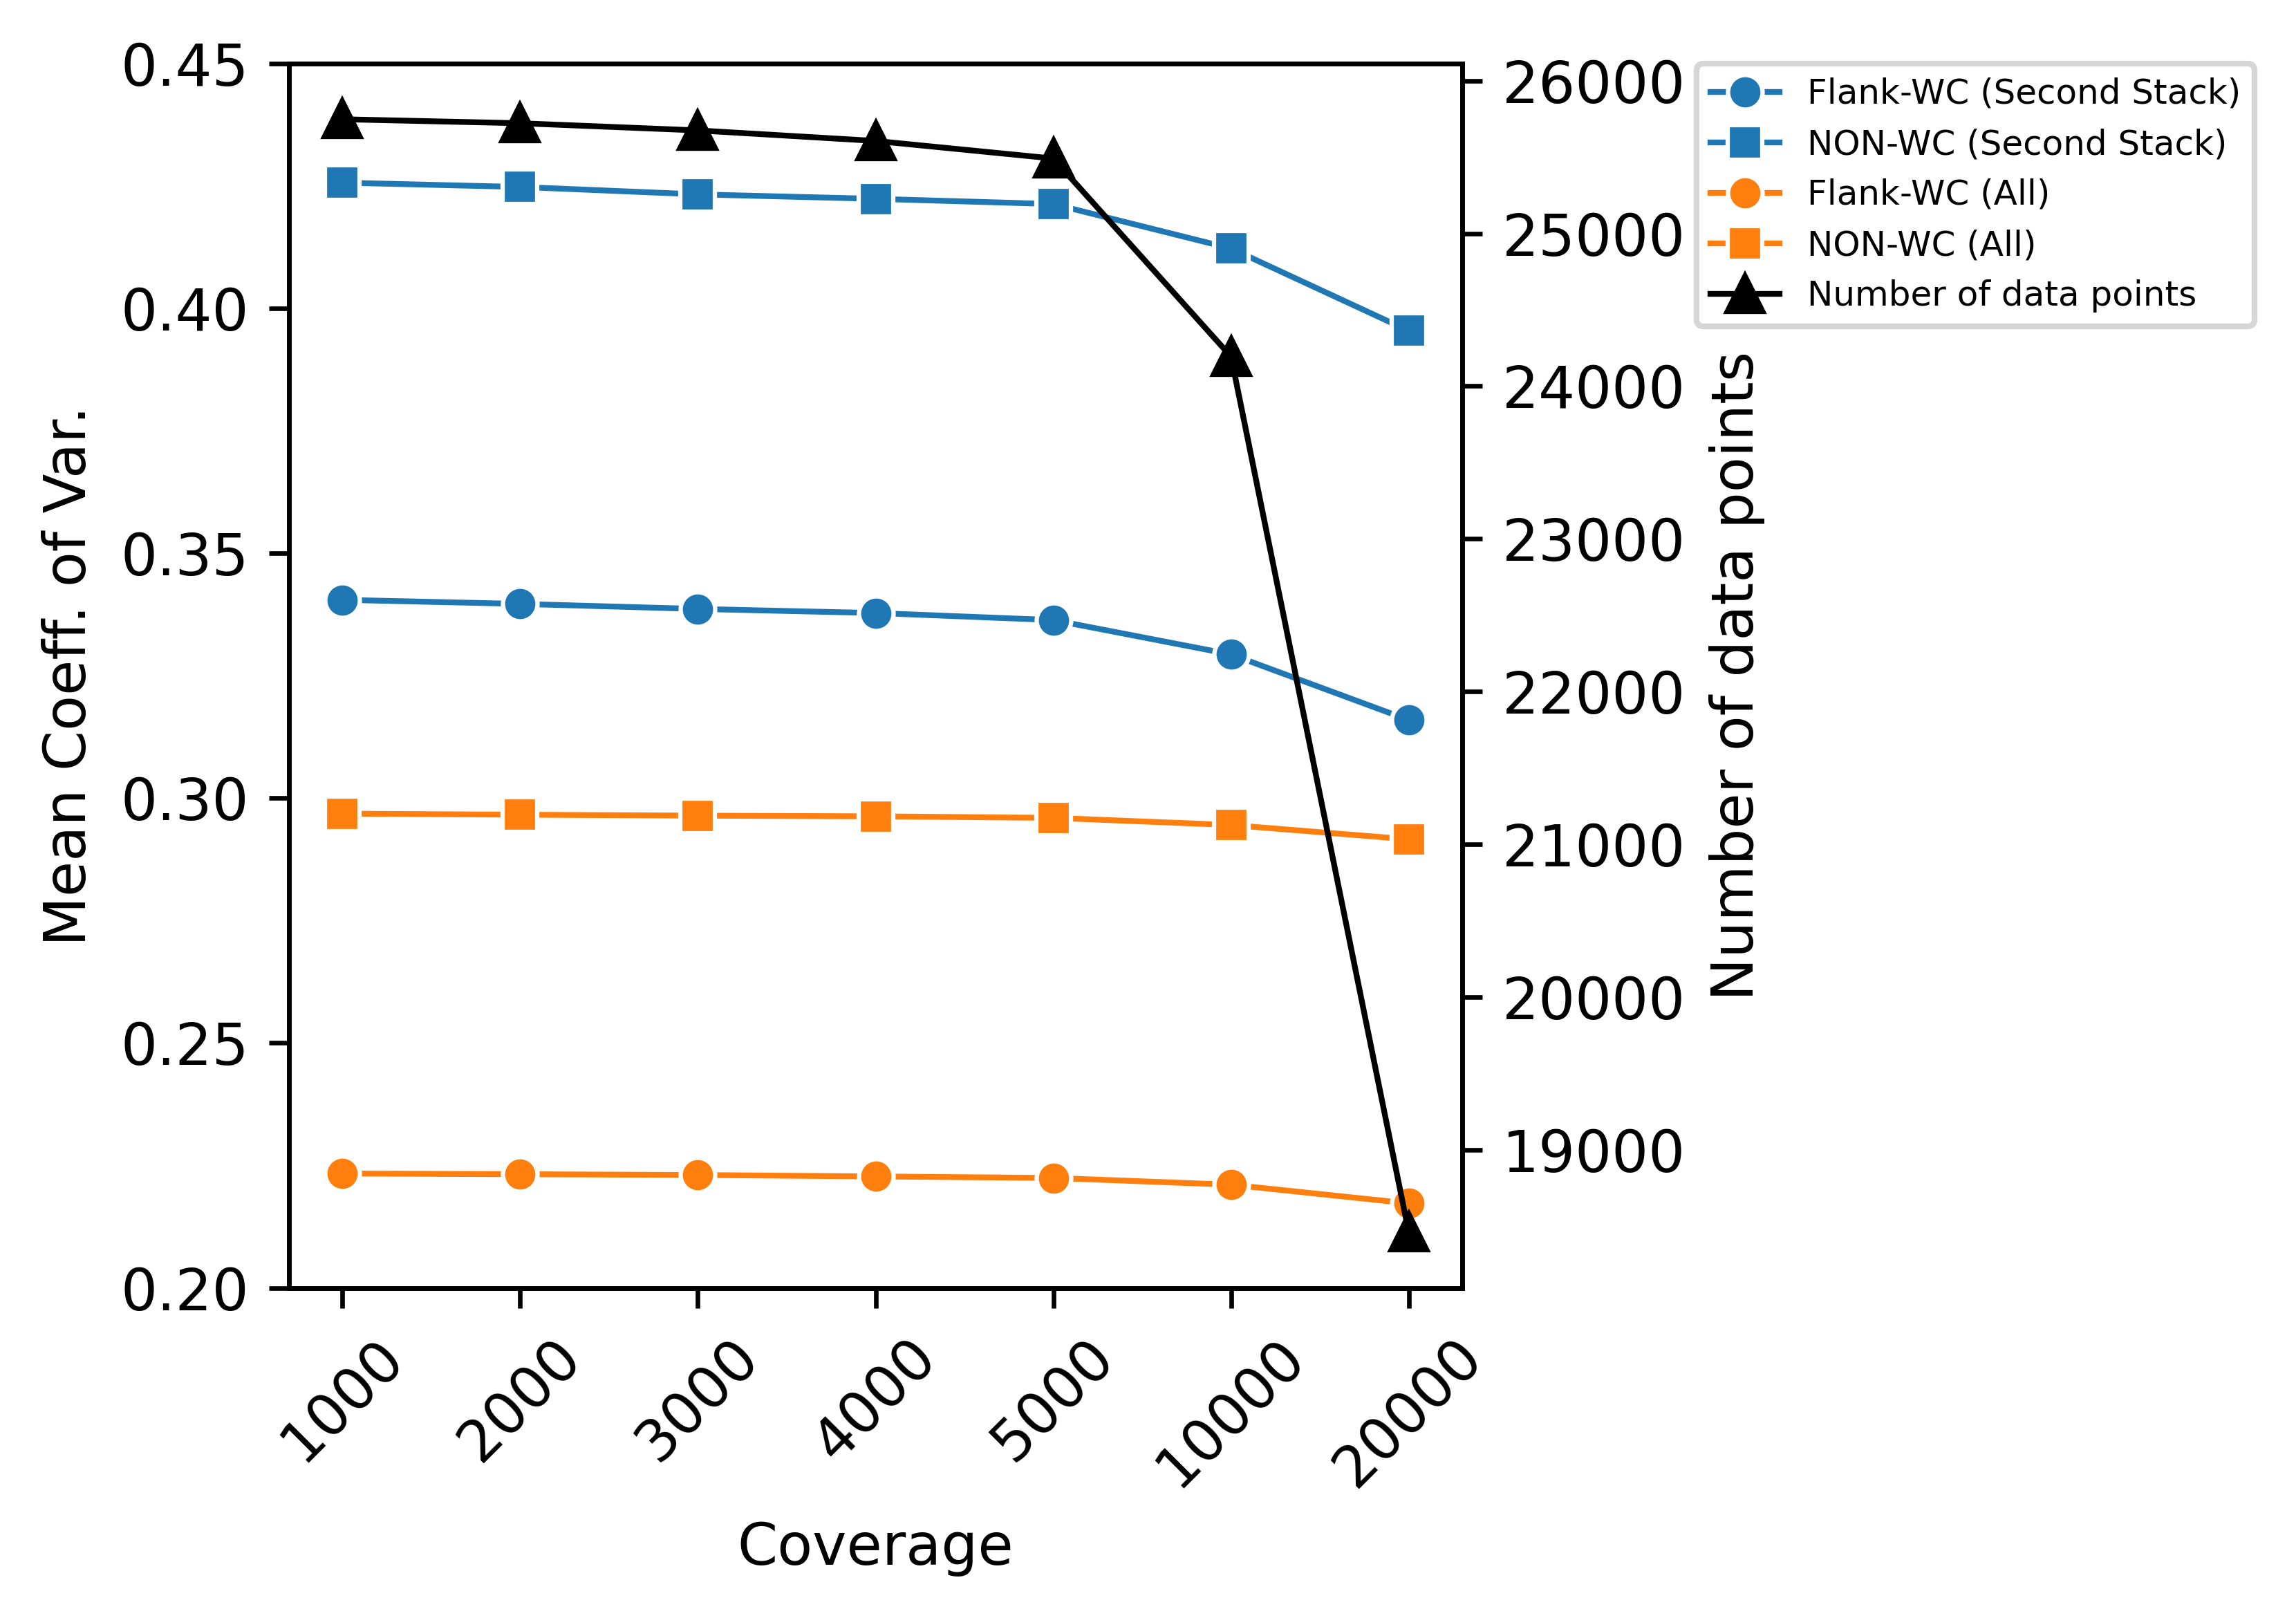

In [23]:
# Ensure correct data types
summary["num_aligned"] = summary["num_aligned"].astype(str)
length_summary = pd.DataFrame(
    {
        "num_aligned": [1000, 2000, 3000, 4000, 5000, 10000, 20000],
        "length": [
            len(df_all_1000),
            len(df_all_2000),
            len(df_all_3000),
            len(df_all_4000),
            len(df_all_5000),
            len(df_all_10000),
            len(df_all_20000),
        ],
    }
)
length_summary["num_aligned"] = length_summary["num_aligned"].astype(str)
print(length_summary)

# Create plot
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=600)

# Plot main CV data with seaborn
sns_plot = sns.lineplot(
    data=summary,
    x="num_aligned",
    y="cv_r_data",
    hue="r_type",
    style="data_type",
    markers=["o", "s"],
    linewidth=1,
    dashes=False,
    ax=ax1,
    legend=False,  # Suppress auto-legend
)

# Set labels and limits
ax1.set_xlabel("Coverage")
ax1.set_ylabel("Mean Coeff. of Var.")
ax1.set_ylim(0.2, 0.45)

# Secondary y-axis for number of data points
ax2 = ax1.twinx()
(line2,) = ax2.plot(
    length_summary["num_aligned"],
    length_summary["length"],
    color="black",
    marker="^",
    label="Number of data points",
    linewidth=1,
)
ax2.set_ylabel("Number of data points")

# Manually set legend handles and labels
# You must manually recreate the seaborn line handles if legend=False was used
# We'll use ax1.lines list in plotting order:
line1 = ax1.lines[0]  # Flank-WC / Second Stack
line2_ = ax1.lines[1]  # NON-WC / Second Stack
line3 = ax1.lines[2]  # Flank-WC / all
line4 = ax1.lines[3]  # NON-WC / all

handles = [line1, line2_, line3, line4, line2]
labels = [
    "Flank-WC (Second Stack)",
    "NON-WC (Second Stack)",
    "Flank-WC (All)",
    "NON-WC (All)",
    "Number of data points",
]

# Apply custom legend
ax1.legend(
    handles,
    labels,
    bbox_to_anchor=(1.2, 1),
    loc="upper left",
    borderaxespad=0.0,
    fontsize=6,
)

# Set consistent x-tick values
ax1.set_xticks(range(7))
ax1.set_xticklabels(
    ["1000", "2000", "3000", "4000", "5000", "10000", "20000"], rotation=45
)


plt.tight_layout()
plt.show()

## The reactivity distribution for Flank-WC pairs and non-WC under denaturing conditions

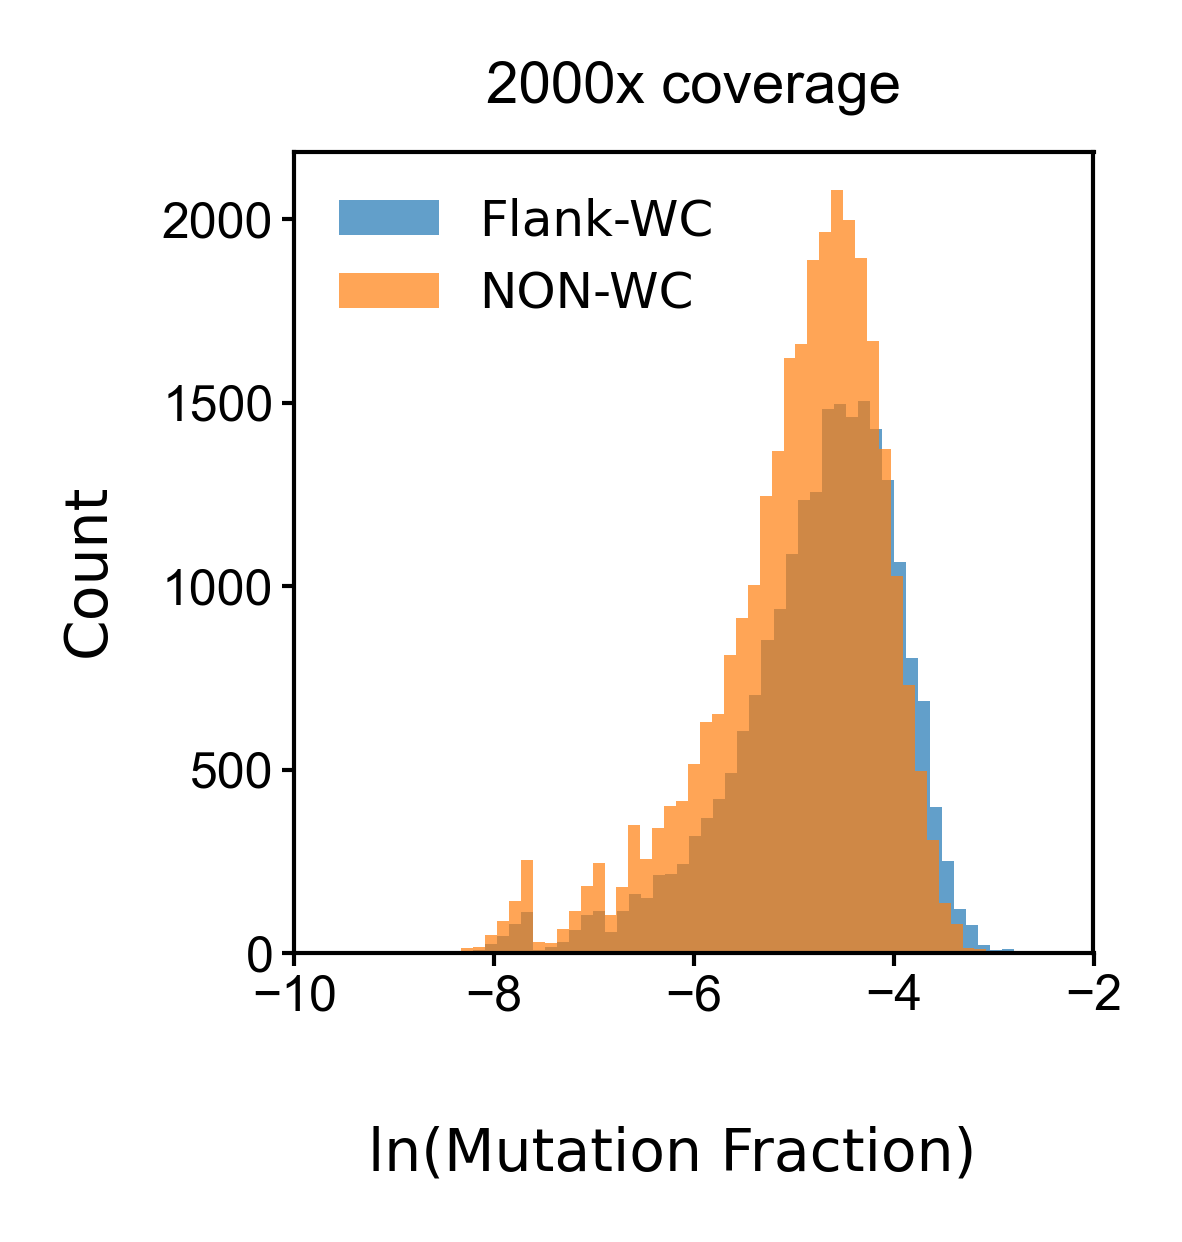

In [24]:
def plot_figure_2d(df, ax, title=None):
    ax.hist(
        df.query("r_type == 'Flank-WC' and ln_r_data != -9.8")["ln_r_data"],
        bins=50,
        color="tab:blue",
        alpha=0.7,
        label="Flank-WC",
    )
    ax.hist(
        df.query("r_type == 'NON-WC' and ln_r_data != -9.8")["ln_r_data"],
        bins=50,
        color="tab:orange",
        alpha=0.7,
        label="NON-WC",
    )
    ax.set_xlim(-10, -2)

    # Smaller font size for ticks
    ax.tick_params(axis="both", labelsize=6)
    format_small_plot(ax)

    if title:
        ax.set_title(title, fontsize=7)


fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
plot_figure_2d(df_denature_res, ax, title="2000x coverage")

# Shared y-axis label
fig.text(0.04, 0.5, "Count", va="center", rotation="vertical", fontsize=7)

# Shared x-axis label
fig.text(0.55, 0, "ln(Mutation Fraction)", ha="center", fontsize=7)

# Legend with smaller font
ax.legend(loc="upper left", fontsize=6, frameon=False)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()

## Non-WC and WC overlaps with different normalization methods

### Normalizing with denatured reactivity

In [25]:
# Simplify residue type labels by replacing "Flank-WC" with "WC"
df_denature_norm_res["r_type_simple"] = df_denature_norm_res["r_type"].replace(
    "Flank-WC", "WC"
)

# Compute the natural log of r_data values
df_denature_norm_res["ln_r_data"] = np.log(df_denature_norm_res["r_data"])

# Replace infinite log values with respective inf_sub, here it is -7.6
bad_mask = ~np.isfinite(df_denature_norm_res["ln_r_data"])
df_denature_norm_res.loc[bad_mask, "ln_r_data"] = -7.6

/Users/sdeenalattha2/Desktop/2024_07_09_3d_structure_features_paper/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
# Convert 'r_type' to binary (1 for 'WC', 0 for 'NON-WC')
df_denature_norm_res["r_type_binary"] = df_denature_norm_res["r_type_simple"].apply(
    lambda x: 1 if x == "WC" else 0
)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(df_denature_norm_res[["ln_r_data"]], df_denature_norm_res["r_type_binary"])

# Compute probabilities for the original data
df_denature_norm_res["prob_WC"] = model.predict_proba(
    df_denature_norm_res[["ln_r_data"]]
)[:, 1]

# Display the probabilities
df_denature_norm_res.sort_values("prob_WC", ascending=False)[
    ["ln_r_data", "r_type_simple", "prob_WC"]
]

,ln_r_data,r_type_simple,prob_WC
468069,-7.600000,WC,0.953164
201170,-7.600000,WC,0.953164
201815,-7.600000,WC,0.953164
201811,-7.600000,WC,0.953164
201802,-7.600000,WC,0.953164
...,...,...,...
66570,5.557840,NON-WC,0.181944
229330,5.644563,NON-WC,0.177555
463438,5.864093,NON-WC,0.166817
463439,6.149063,NON-WC,0.153661


In [27]:
# Calculate the absolute difference between each value in the column 'prob_WC' and 0.5
df_denature_norm_res["abs_diff"] = (df_denature_norm_res["prob_WC"] - 0.50).abs()

# Find the index of the minimum difference
min_index = df_denature_norm_res["abs_diff"].idxmin()

# Retrieve the entire row that is closest to 0.5 in the 'prob_WC' column
closest_row = df_denature_norm_res.loc[min_index]

print("The row with the value in 'prob_WC' closest to 0.5 is:")
print(closest_row["ln_r_data"])

The row with the value in 'prob_WC' closest to 0.5 is:
1.1783771115814061


In [28]:
threshold = 1.18
df_denature_norm_res = df_denature_norm_res.query("ln_r_data != 0").copy()
orange_left, blue_right = compute_distribution_splits(
    df_denature_norm_res, threshold, column="ln_r_data"
)
print(f"% of NON-WC (orange) left of threshold: {orange_left:.2f}%")
print(f"% of Flank-WC (blue) right of threshold: {blue_right:.2f}%")

% of NON-WC (orange) left of threshold: 67.60%
% of Flank-WC (blue) right of threshold: 1.69%


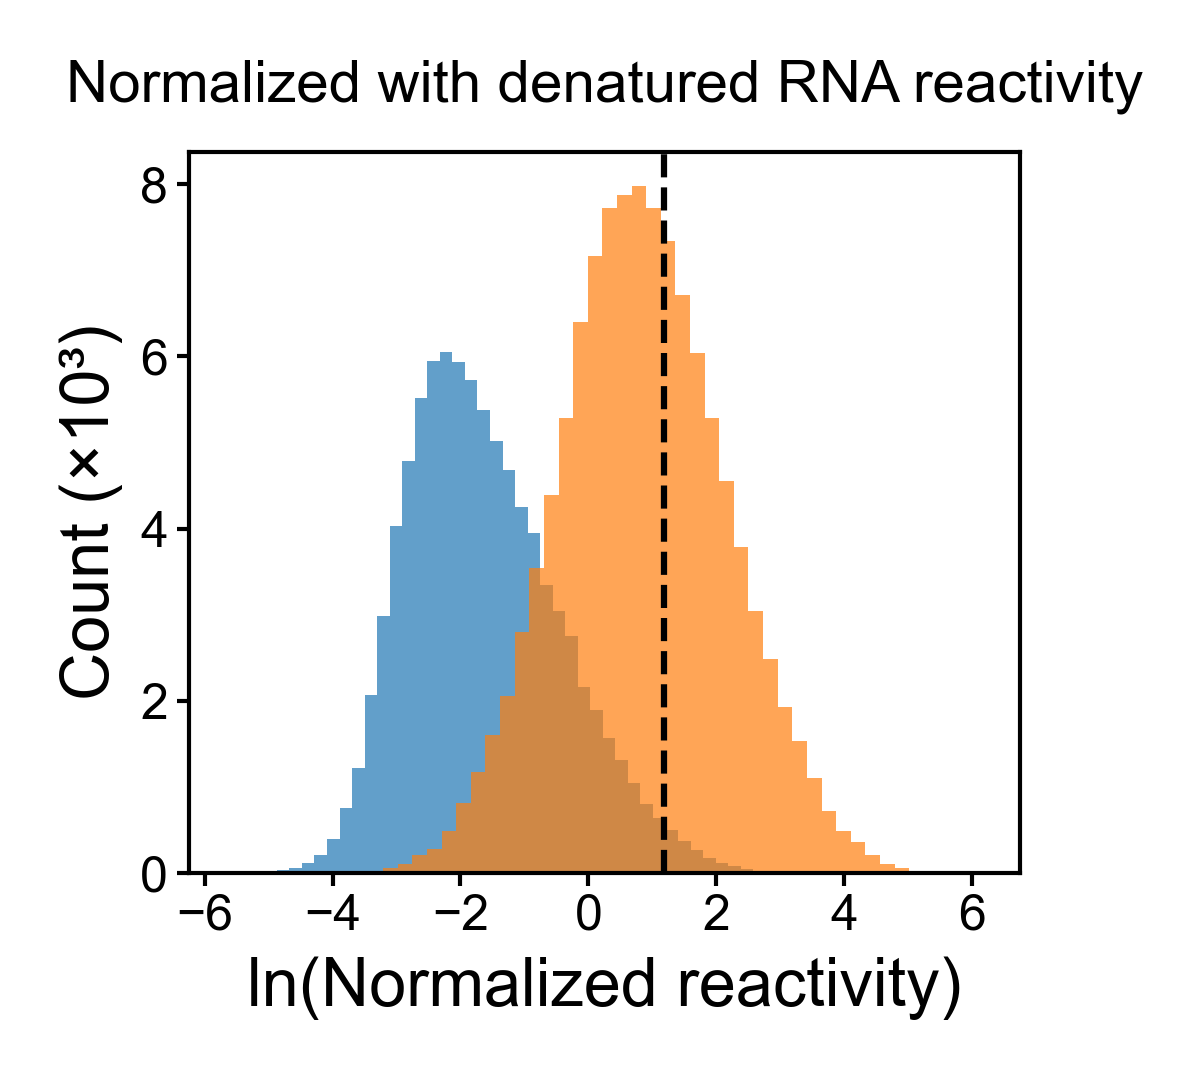

In [29]:
def plot_figure_2d1(df, ax, title=None, threshold=threshold):
    ax.hist(
        df.query("r_type == 'Flank-WC' and ln_r_data != -7.6")["ln_r_data"],
        bins=50,
        color="tab:blue",
        alpha=0.7,
        label="Flank-WC",
    )
    ax.hist(
        df.query("r_type == 'NON-WC' and ln_r_data != -7.6")["ln_r_data"],
        bins=50,
        color="tab:orange",
        alpha=0.7,
        label="NON-WC",
    )

    # Smaller font size for ticks
    ax.tick_params(axis="both", labelsize=6)
    ax.axvline(x=threshold, color="black", linestyle="--", linewidth=0.75)
    ax.set_ylabel("Count (×10³)", labelpad=2)
    ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
    ax.set_yticks([0, 2000, 4000, 6000, 8000], labels=["0", "2", "4", "6", "8"])
    ax.set_xlabel("ln(Normalized reactivity)", labelpad=2)
    format_small_plot(ax)
    if title:
        ax.set_title(title, fontsize=7)


fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
plot_figure_2d1(
    df_denature_norm_res, ax, title="Normalized with denatured RNA reactivity"
)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

### Normalizing by averaging

In [30]:
# Simplify residue type labels by replacing "Flank-WC" with "WC"
df_avg["r_type_simple"] = df_avg["r_type"].replace("Flank-WC", "WC")

# Compute the natural log of r_data values
df_avg["ln_r_avg"] = np.log(df_avg["r_avg"])

# Replace infinite log values with respective inf_sub, here it is -9.8
df_avg.loc[np.isinf(df_avg["ln_r_avg"]), "ln_r_avg"] = -9.8

In [31]:
# Convert 'r_type' to binary (1 for 'WC', 0 for 'NON-WC')
df_avg["r_type_binary"] = df_avg["r_type_simple"].apply(lambda x: 1 if x == "WC" else 0)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(df_avg[["ln_r_avg"]], df_avg["r_type_binary"])

# Compute probabilities for the original data
df_avg["prob_WC"] = model.predict_proba(df_avg[["ln_r_avg"]])[:, 1]

# Display the probabilities
df_avg.sort_values("prob_WC", ascending=False)[["ln_r_avg", "r_type_simple", "prob_WC"]]

,ln_r_avg,r_type_simple,prob_WC
2232,-7.673473,WC,0.999800
3756,-7.607591,WC,0.999747
1293,-7.540412,WC,0.999678
4033,-7.487574,WC,0.999610
2729,-7.476829,WC,0.999595
...,...,...,...
900,-1.923837,NON-WC,0.000005
891,-1.905091,NON-WC,0.000005
3991,-1.848473,NON-WC,0.000004
912,-1.687743,NON-WC,0.000002


In [32]:
# Calculate the absolute difference between each value in the column 'prob_WC' and 0.5
df_avg["abs_diff"] = (df_avg["prob_WC"] - 0.50).abs()

# Find the index of the minimum difference
min_index = df_avg["abs_diff"].idxmin()

# Retrieve the entire row that is closest to 0.5 in the 'prob_WC' column
closest_row = df_avg.loc[min_index]

print("The row with the value in 'prob_WC' closest to 0.5 is:")
print(closest_row["ln_r_avg"])

The row with the value in 'prob_WC' closest to 0.5 is:
-5.302513658679446


In [33]:
threshold = -5.28
df_avg = df_avg.query("ln_r_avg != 0").copy()
orange_left, blue_right = compute_distribution_splits(
    df_avg, threshold, column="ln_r_avg"
)
print(f"% of NON-WC (orange) left of threshold: {orange_left:.2f}%")
print(f"% of Flank-WC (blue) right of threshold: {blue_right:.2f}%")

% of NON-WC (orange) left of threshold: 9.05%
% of Flank-WC (blue) right of threshold: 7.11%


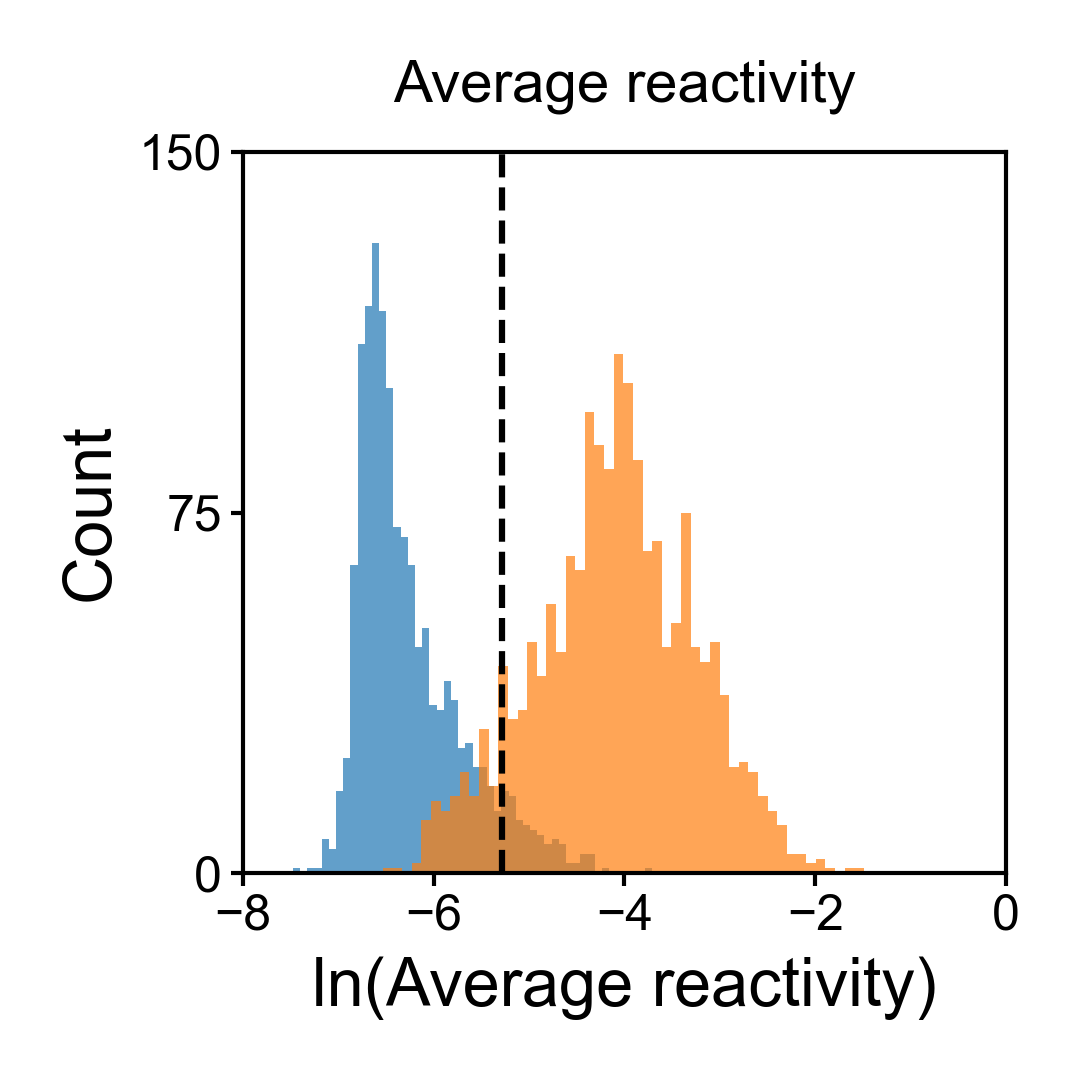

In [34]:
def plot_figure_2d2(df, ax, title=None, threshold=threshold):
    ax.hist(
        df.query("r_type == 'Flank-WC' and ln_r_avg != -9.8")["ln_r_avg"],
        bins=50,
        color="tab:blue",
        alpha=0.7,
        label="Flank-WC",
    )
    ax.hist(
        df.query("r_type == 'NON-WC' and ln_r_avg != -9.8")["ln_r_avg"],
        bins=50,
        color="tab:orange",
        alpha=0.7,
        label="NON-WC",
    )

    # Smaller font size for ticks
    ax.tick_params(axis="both", labelsize=6)
    ax.axvline(x=threshold, color="black", linestyle="--", linewidth=0.75)
    ax.set_ylabel("Count", labelpad=2)
    ax.set_xticks([-8, -6, -4, -2, 0])
    ax.set_yticks([0, 75, 150], labels=["0", "75", "150"])
    ax.set_xlabel("ln(Average reactivity)", labelpad=2)
    format_small_plot(ax)
    if title:
        ax.set_title(title, fontsize=7)


fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
plot_figure_2d2(df_avg, ax, title="Average reactivity")

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

### Normalizing with refernce hairpin

In [35]:
df_construct["name"] = df_construct["name"].str.strip().str.lower()
df_2000_res["constructs"] = df_2000_res["constructs"].str.strip().str.lower()

In [36]:
# Dictionary to store average A values for each construct
A_average = {}

# Loop through each row in the construct dataframe
for i, row in df_construct.iterrows():
    # Create an object from sequence and structure
    struct = SecStruct(row["sequence"], row["structure"])

    # Extract hairpin motifs from the object
    hairpins = struct.get_hairpins()

    # If hairpins exist, compute the average value for specific positions (2As in the hairpin)
    if hairpins:
        try:
            # Select positions 2 and 5 from the first hairpin
            pos1 = hairpins[0].positions[2]
            pos2 = hairpins[0].positions[5]

            # Compute average of the data values at those positions
            A_avg = (row["data"][pos1] + row["data"][pos2]) / 2

            # Store the average in dictionary with construct name as key
            A_average[row["name"]] = A_avg

        # Handle cases where hairpin has fewer positions than expected
        except IndexError:
            print(f"Warning: Not enough positions in hairpin at index {i}")

        # Handle any other unexpected errors
        except Exception as e:
            print(f"Unexpected error at index {i}: {e}")

In [37]:
# Create a list to store normalized r_data values
norm_r_data = []

# Loop through each row in the dataframe and normalize r_data using A_average (the average A reactivity of the 2As in the reference hairpin)
for i, row in df_2000_res.iterrows():
    norm_r_data.append(row["r_data"] / A_average[row["constructs"]])

# Add the normalized values as a new column in the dataframe
df_2000_res["norm_r_data"] = norm_r_data

# Print the normalized r_data column
print(df_2000_res["norm_r_data"])

0         0.013271
1         0.041791
2         0.067332
3         0.097950
4         0.027183
            ...   
467830    0.110919
467831    0.042730
467832    0.057325
467833    0.070336
467834    0.093203
Name: norm_r_data, Length: 235104, dtype: float64


In [38]:
# Simplify residue type labels by replacing "Flank-WC" with "WC"
df_2000_res["r_type_simple"] = df_2000_res["r_type"].replace("Flank-WC", "WC")

# Compute the natural log of r_data values
df_2000_res["ln_norm_r_data"] = np.log(df_2000_res["norm_r_data"])

# Replace infinite log values with respective inf_sub, here it is -9.8
df_2000_res.loc[np.isinf(df_2000_res["ln_norm_r_data"]), "ln_norm_r_data"] = -9.8
print(df_2000_res["ln_norm_r_data"])

0        -4.322192
1        -3.175073
2        -2.698114
3        -2.323296
4        -3.605158
            ...   
467830   -2.198954
467831   -3.152851
467832   -2.859021
467833   -2.654472
467834   -2.372972
Name: ln_norm_r_data, Length: 235104, dtype: float64


/Users/sdeenalattha2/Desktop/2024_07_09_3d_structure_features_paper/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
# Convert 'r_type' to binary (1 for 'WC', 0 for 'NON-WC')
df_2000_res["r_type_binary"] = df_2000_res["r_type_simple"].apply(
    lambda x: 1 if x == "WC" else 0
)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(df_2000_res[["ln_norm_r_data"]], df_2000_res["r_type_binary"])

# Compute probabilities for the original data
df_2000_res["prob_WC"] = model.predict_proba(df_2000_res[["ln_norm_r_data"]])[:, 1]

# Display the probabilities
df_2000_res.sort_values("prob_WC", ascending=False)[
    ["ln_norm_r_data", "r_type_simple", "prob_WC"]
]

,ln_norm_r_data,r_type_simple,prob_WC
279415,-9.800000,WC,1.000000
256805,-9.800000,WC,1.000000
12617,-9.800000,WC,1.000000
4803,-9.800000,WC,1.000000
333059,-9.800000,WC,1.000000
...,...,...,...
463233,2.404762,NON-WC,0.000002
105290,2.435467,NON-WC,0.000002
463227,2.468573,NON-WC,0.000002
463209,2.492341,NON-WC,0.000002


In [40]:
# Calculate the absolute difference between each value in the column 'prob_WC' and 0.5
df_2000_res["abs_diff"] = (df_2000_res["prob_WC"] - 0.50).abs()

# Find the index of the minimum difference
min_index = df_2000_res["abs_diff"].idxmin()

# Retrieve the entire row that is closest to 0.5 in the 'prob_WC' column
closest_row = df_2000_res.loc[min_index]

print("The row with the value in 'prob_WC' closest to 0.5 is:")
print(closest_row["ln_norm_r_data"])

The row with the value in 'prob_WC' closest to 0.5 is:
-2.055634308000913


In [41]:
threshold = -2.10
df_2000_res = df_2000_res.query("ln_norm_r_data != 0").copy()
orange_left, blue_right = compute_distribution_splits(
    df_2000_res, threshold, column="ln_norm_r_data"
)
print(f"% of NON-WC (orange) left of threshold: {orange_left:.2f}%")
print(f"% of Flank-WC (blue) right of threshold: {blue_right:.2f}%")

% of NON-WC (orange) left of threshold: 8.06%
% of Flank-WC (blue) right of threshold: 11.45%


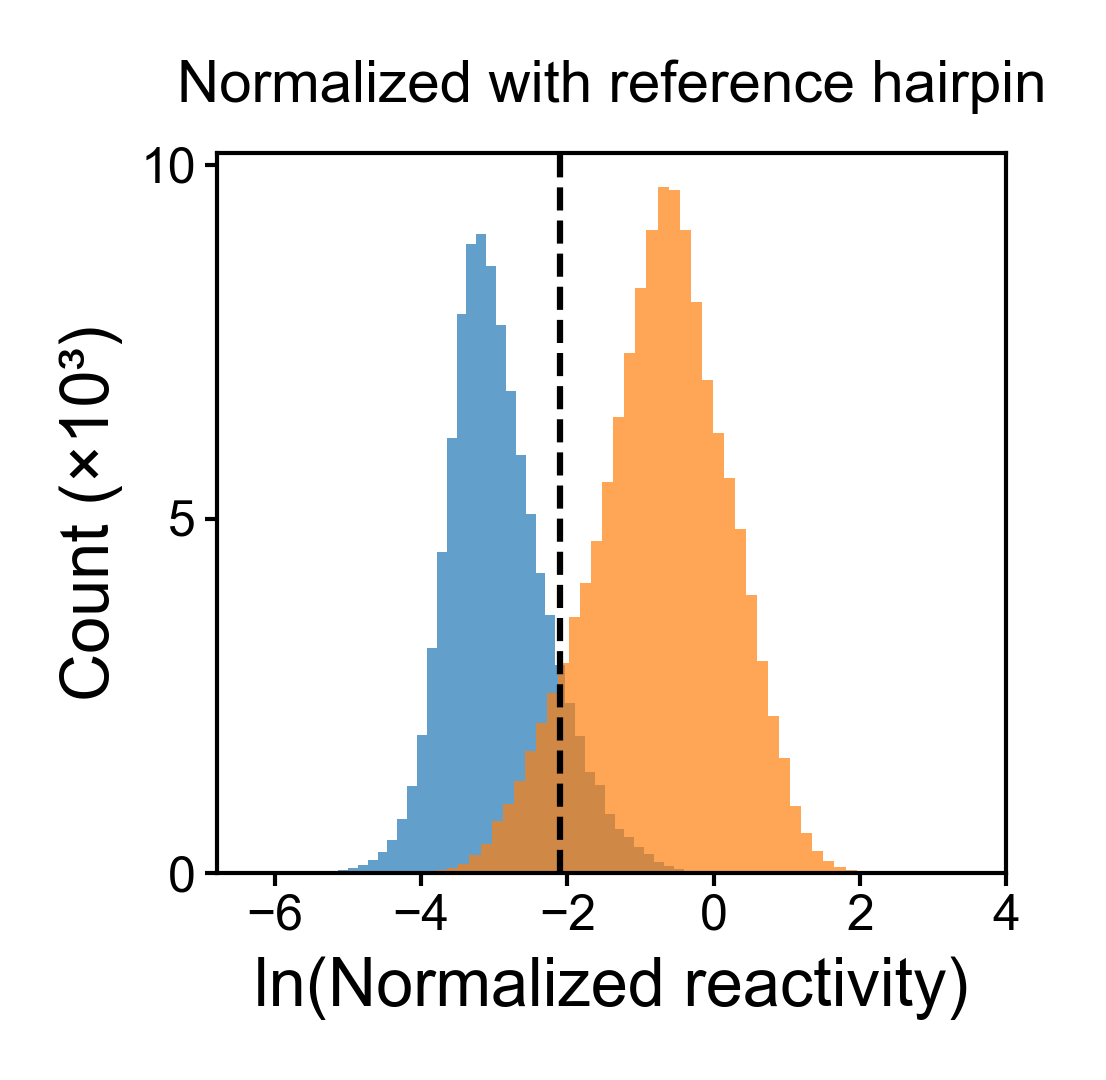

In [42]:
def plot_figure_2d3(df, ax, title=None, threshold=threshold):
    ax.hist(
        df.query("r_type == 'Flank-WC' and ln_norm_r_data != -9.8")["ln_norm_r_data"],
        bins=50,
        color="tab:blue",
        alpha=0.7,
        label="Flank-WC",
    )
    ax.hist(
        df.query("r_type == 'NON-WC' and ln_norm_r_data != -9.8")["ln_norm_r_data"],
        bins=50,
        color="tab:orange",
        alpha=0.7,
        label="NON-WC",
    )

    # Smaller font size for ticks
    ax.tick_params(axis="both", labelsize=6)
    ax.axvline(x=threshold, color="black", linestyle="--", linewidth=0.75)
    ax.set_ylabel("Count (×10³)", labelpad=2)
    ax.set_xticks([-6, -4, -2, 0, 2, 4])
    ax.set_yticks([0, 5000, 10000], labels=["0", "5", "10"])
    ax.set_xlabel("ln(Normalized reactivity)", labelpad=2)
    format_small_plot(ax)

    if title:
        ax.set_title(title, fontsize=7)


fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
plot_figure_2d3(df_2000_res, ax, title="Normalized with reference hairpin")

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

### Normalizing with nomod reactivity

In [43]:
# Simplify residue type labels by replacing "Flank-WC" with "WC"
df_nomod_norm_res["r_type_simple"] = df_nomod_norm_res["r_type"].replace(
    "Flank-WC", "WC"
)

# Compute the natural log of r_data values
df_nomod_norm_res["ln_r_data"] = np.log(df_nomod_norm_res["r_data"])

# Replace infinite log values with respective inf_sub, here it is -5.3
bad_mask = ~np.isfinite(df_nomod_norm_res["ln_r_data"])
df_nomod_norm_res.loc[bad_mask, "ln_r_data"] = -5.3

/Users/sdeenalattha2/Desktop/2024_07_09_3d_structure_features_paper/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
# Convert 'r_type' to binary (1 for 'WC', 0 for 'NON-WC')
df_nomod_norm_res["r_type_binary"] = df_nomod_norm_res["r_type_simple"].apply(
    lambda x: 1 if x == "WC" else 0
)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(df_nomod_norm_res[["ln_r_data"]], df_nomod_norm_res["r_type_binary"])

# Compute probabilities for the original data
df_nomod_norm_res["prob_WC"] = model.predict_proba(df_nomod_norm_res[["ln_r_data"]])[
    :, 1
]

# Display the probabilities
df_nomod_norm_res.sort_values("prob_WC", ascending=False)[
    ["ln_r_data", "r_type_simple", "prob_WC"]
]

,ln_r_data,r_type_simple,prob_WC
147641,-5.300000,WC,0.998793
96517,-5.300000,NON-WC,0.998793
188340,-5.300000,WC,0.998793
51667,-5.300000,WC,0.998793
51670,-5.300000,WC,0.998793
...,...,...,...
217130,7.556951,NON-WC,0.019057
461371,7.571259,NON-WC,0.018836
308908,7.586876,NON-WC,0.018598
461376,7.598600,NON-WC,0.018422


In [45]:
# Calculate the absolute difference between each value in the column 'prob_WC' and 0.5
df_nomod_norm_res["abs_diff"] = (df_nomod_norm_res["prob_WC"] - 0.50).abs()

# Find the index of the minimum difference
min_index = df_nomod_norm_res["abs_diff"].idxmin()

# Retrieve the entire row that is closest to 0.5 in the 'prob_WC' column
closest_row = df_nomod_norm_res.loc[min_index]

print("The row with the value in 'prob_WC' closest to 0.5 is:")
print(closest_row["ln_r_data"])

The row with the value in 'prob_WC' closest to 0.5 is:
2.803360380906535


In [46]:
threshold = 2.80
df_nomod_norm_res = df_nomod_norm_res.query("ln_r_data != 0").copy()
orange_left, blue_right = compute_distribution_splits(
    df_nomod_norm_res, threshold, column="ln_r_data"
)
print(f"% of NON-WC (orange) left of threshold: {orange_left:.2f}%")
print(f"% of Flank-WC (blue) right of threshold: {blue_right:.2f}%")

% of NON-WC (orange) left of threshold: 43.24%
% of Flank-WC (blue) right of threshold: 9.05%


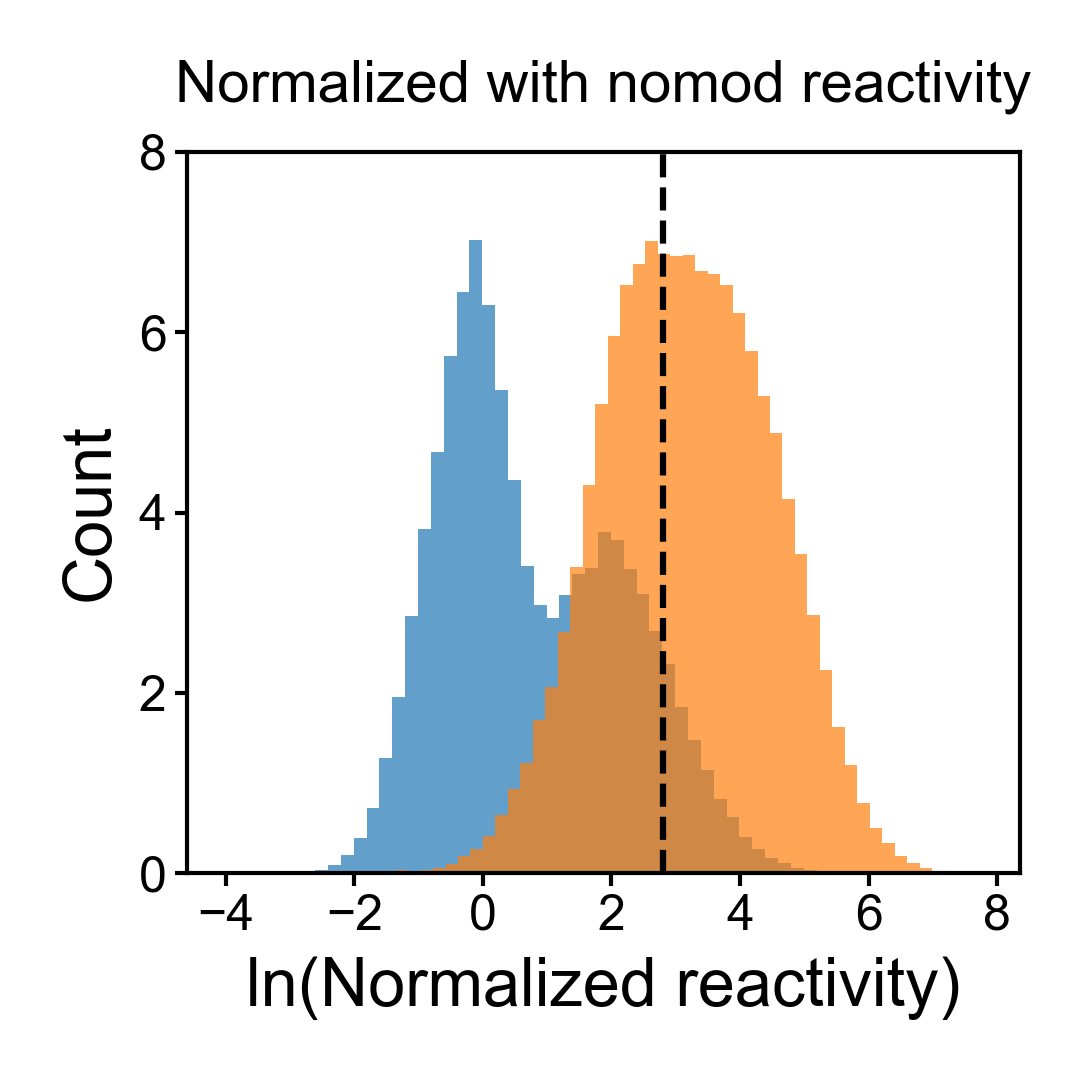

In [47]:
def plot_figure_2d4(df, ax, title=None, threshold=threshold):
    ax.hist(
        df.query("r_type == 'Flank-WC' and ln_r_data != -5.3")["ln_r_data"],
        bins=50,
        color="tab:blue",
        alpha=0.7,
        label="Flank-WC",
    )
    ax.hist(
        df.query("r_type == 'NON-WC' and ln_r_data != -5.3")["ln_r_data"],
        bins=50,
        color="tab:orange",
        alpha=0.7,
        label="NON-WC",
    )

    # Smaller font size for ticks
    ax.tick_params(axis="both", labelsize=6)
    ax.axvline(x=threshold, color="black", linestyle="--", linewidth=0.75)
    ax.set_ylabel("Count", labelpad=2)
    ax.set_xticks([-4, -2, 0, 2, 4, 6, 8])
    ax.set_yticks([0, 2000, 4000, 6000, 8000], labels=["0", "2", "4", "6", "8"])
    ax.set_xlabel("ln(Normalized reactivity)", labelpad=2)
    format_small_plot(ax)
    if title:
        ax.set_title(title, fontsize=7)


fig, ax = plt.subplots(figsize=(2, 2), dpi=600)
plot_figure_2d4(df_nomod_norm_res, ax, title="Normalized with nomod reactivity")

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

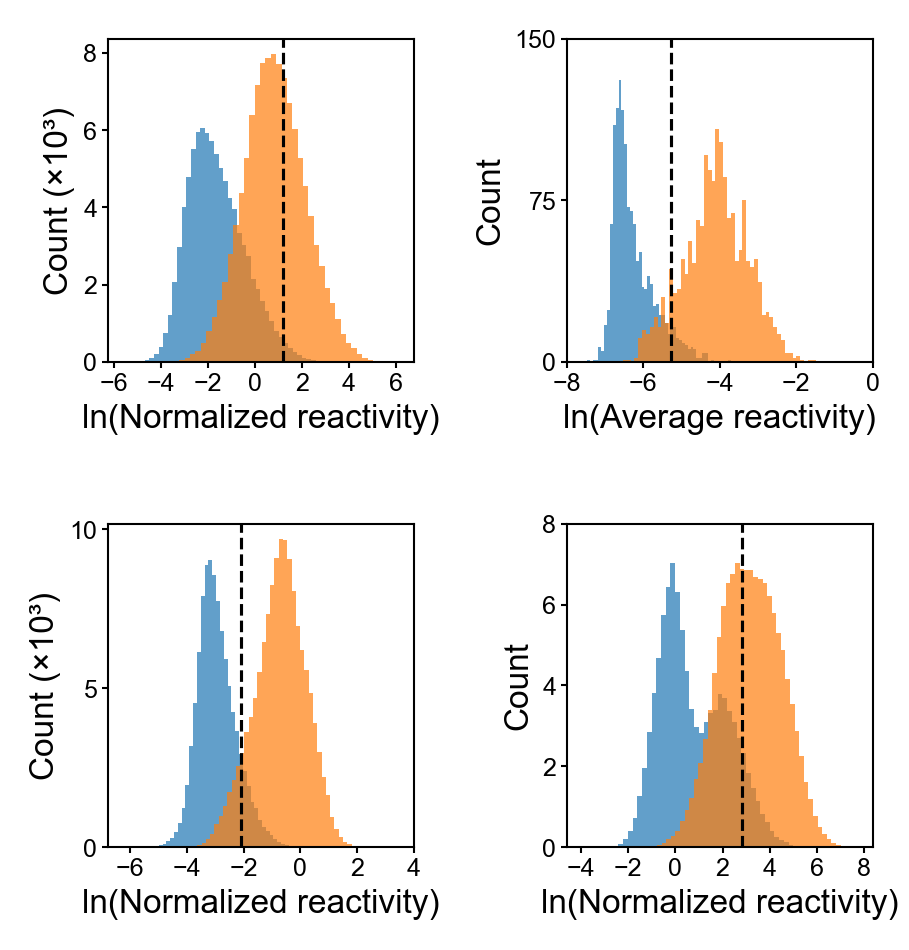

In [48]:
# Create a 2x2 grid of subplots with custom plots and save as a high-resolution figure

plt.rcParams["font.family"] = "Arial"
fig = plt.figure(figsize=(4.25, 3.5), dpi=300)
gs = gridspec.GridSpec(2, 2)

# First row: one column each
ax1 = fig.add_subplot(gs[0, 0])
plot_figure_2d1(df_denature_norm_res, ax1, threshold=1.19)

ax2 = fig.add_subplot(gs[0, 1])
plot_figure_2d2(df_avg, ax2, threshold=-5.28)

# Second row: one column each
ax3 = fig.add_subplot(gs[1, 0])
plot_figure_2d3(df_2000_res, ax3, threshold=-2.10)

ax4 = fig.add_subplot(gs[1, 1])
plot_figure_2d4(df_nomod_norm_res, ax4, threshold=2.81)

# Update spacing
gs.update(hspace=0.5, wspace=0.5)

plt.savefig(f"{REVISION_PATH}/figures/S10.png", dpi=600, pad_inches=0.0)